# 图像增强


通过增强图像的高频部分，从而增强图像的边缘和细节，使其更加清晰。

两种方法：
- Unsharp masking
- High-pass filters


# Unsharp masking

非锐化掩蔽：创建一个掩模，进而用于锐化原始图像。

![](image/unsharp.png)

工作原理：

- 模糊原图：对原始图像应用低通滤波（通常是高斯滤波），产生一个模糊版本的图像。
- 创建掩模：将模糊后的图像从原图中减去，得到差异图像，即“掩模”。这个掩模包含了原图中的高频细节。
- 增强原图：将这个掩模乘以一个称为“强度”的因子，然后将结果加回到原始图像中，以增强原图的边缘和细节。


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


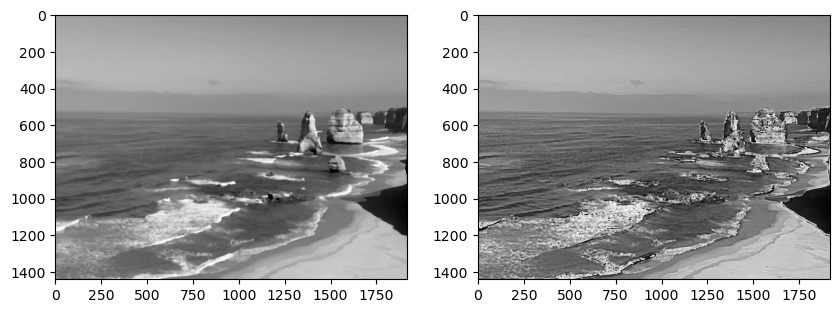

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 不建议直接加减法
img = cv2.imread("image/sample-sharpen.jpg", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)

# unsharp masking
gaussian_blurred = cv2.GaussianBlur(img, ksize=(19, 19), sigmaX=50)
high_freq = img - gaussian_blurred
sharped = img + high_freq * 2

# sharped = cv2.add(img3, high_freq)

plt.imshow(sharped, cmap='gray')
plt.show()


# High-pass filter

直接使用高通滤波器（如Sobel或Laplacian）来增强图像中的高频部分，即直接强调图像中的边缘和细节。

工作原理：
1. 应用一个高通滤波器到原图，这种滤波器设计来通过强调突变（如边缘）来让低频信号衰减。
2. 可以选择性地将高通滤波的结果加到原图上，从而强化图像的细节和边缘。

特点：
- 直接应用高频强化，可能会使图像的噪声也被放大。
- 锐化效果较为直接和强烈，较少的参数调整。



图像锐化（增强）是图像处理中的一个常用技术，它旨在增强图像的边缘和细节，使其更加清晰。锐化的原理是加强或增强图像的高频部分。以下是关于图像锐化的主要知识点：

拉普拉斯锐化：
- 拉普拉斯锐化基于二阶导数，其目的是检测图像的快速变化区域，即边缘。
- 一个常见的拉普拉斯滤波器是:
$$
{\rm{kernel}} = \frac{1}{16}\left[ {\begin{array}{*{20}{c}}
0&-1&0\\
-1&5&-1\\
0&-1&0
\end{array}} \right]
$$
将此滤波器应用于图像，并将得到的结果添加到原始图像上，从而实现锐化效果。

## Laplacian

`cv2.Laplacian()` 和 `cv2.convertScaleAbs()` 两个函数的详细说明及参数解释：

### 1. `cv2.Laplacian()`: 拉普拉斯算子
主要用于计算图像的二阶导数，即梯度变化，它能帮助检测图像中的边缘和细节。

```python
cv2.Laplacian(src, ksize=1, scale=1, delta=0)
```

**参数说明：**
- `src`: 输入图像，通常是灰度图像或单通道图像（可以是彩色图像，但一般情况下使用灰度图像）。
- `ksize`: 滤波核的大小，默认值为 `1`。对于拉普拉斯算子，核大小通常为 `1` 或 `3`。它控制了用于计算拉普拉斯的卷积核大小。
- `scale`: 可选参数，拉普拉斯滤波后的结果会乘以这个系数。默认值为 `1`，表示不进行缩放。
- `delta`: 可选参数，结果会加上这个值，默认值为 `0`。该参数可以用于调整结果的亮度或偏移。


### 2. `cv2.convertScaleAbs()`: 绝对值转换与缩放

```python
cv2.convertScaleAbs(src, alpha=1, beta=0)
```

**参数说明：**
- `src`: 输入图像，通常是一个带有负值的浮点图像（如从拉普拉斯或其他梯度算子得到的结果），需要将其转换为 8 位图像。
- `alpha`: 缩放系数，默认值为 `1`。它用于乘以输入图像中的每个像素值，调整图像的亮度或对比度。
- `beta`: 偏移量，默认值为 `0`。每个像素在乘以 `alpha` 之后，还会加上这个值，进一步调整图像的亮度。

**解释：**
- `cv2.convertScaleAbs()` 将输入图像中的像素值进行缩放和取绝对值，然后将其转换为 8 位图像。
- 因为某些滤波操作（如拉普拉斯）会产生负值，而图像通常只能显示非负值。`convertScaleAbs()` 通过先取绝对值，再转换为 `uint8`，使得负值能够正常显示。

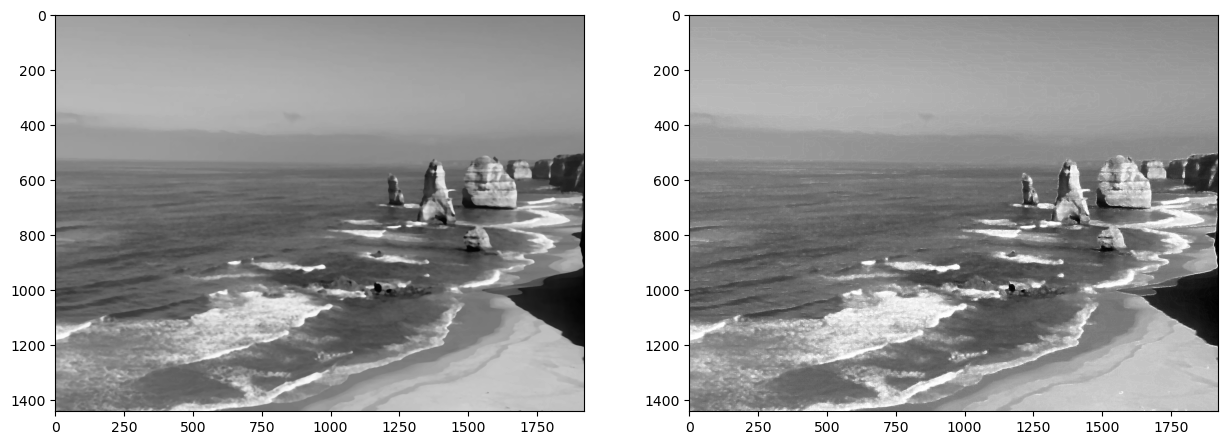

In [2]:
img = cv2.imread("image/sample-sharpen.jpg", cv2.IMREAD_GRAYSCALE)


plt.figure(figsize=(15, 12))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)

gaussian_blurred = cv2.GaussianBlur(img, ksize=(3, 3), sigmaX=5)

lap1 = cv2.Laplacian(img, cv2.CV_64F, ksize=1)
lap2 = cv2.convertScaleAbs(lap1)
# 锐化图像：原图像加上拉普拉斯梯度的结果
sharpened2 = cv2.addWeighted(img, 1, lap2, 4, 0)

sharpened2 = np.clip(sharpened2, 0, 255)
plt.imshow(sharpened2, cmap='gray')
plt.show()

拉普拉斯算子用于边缘检测和图像锐化，梯度的权重及其正负值会直接影响图像锐化的效果。具体来说：

- 正权重：增加图像中边缘的对比度，使边缘变得更加明显。这是因为正权重会增强图像的高频成分（例如边缘）。
- 负权重：减少图像中的边缘效果，使图像变得更加平滑。这是因为负权重会削弱图像的高频成分。

权重的大小决定了锐化或平滑效果的强弱。更大的正权重会使图像边缘更加锐利，而更大的负权重会使图像变得更加模糊。


## filter2D的实现方式

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


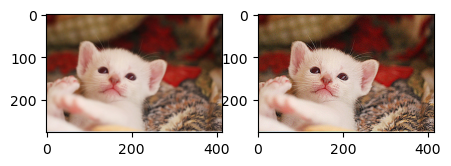

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5, 5))


def custom_blur_demo(image):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32)  #锐化
    dst = cv2.filter2D(image, -1, kernel=kernel)
    plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))


src = cv2.imread("./images2/sharpen.png")
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
custom_blur_demo(src)

# 两种方法对比


主要区别：

处理方法：Unsharp Masking使用了原图的模糊版本来增强细节，而高通滤波锐化直接利用高通滤波器来识别和增强边缘。

控制度：Unsharp Masking通常提供更多的控制，包括能够调整模糊程度和增强程度，适合更精细的图像处理需求。高通滤波更为直接，通常用于需要强烈锐化效果的场合。


高通滤波锐化：
- 高通滤波可以强调图像的高频部分，例如边缘和噪声。
- 常见的方法是先使用低通滤波器（如均值滤波或高斯滤波）对图像进行平滑，然后从原始图像中减去平滑后的图像，得到高频组件。最后，将高频组件加回到原图上以达到锐化效果。

Unsharp Masking：
- 这是一种常用的图像锐化技术。首先，原始图像被模糊（通常使用高斯滤波），然后模糊的图像从原始图像中减去，得到所谓的"mask"。最后，这个mask被加回到原始图像上。
这种方法的名字可能会引起混淆，因为它是通过增强图像的高频部分来“锐化”图像的。

锐化的副作用：
- 过度锐化可能导致图像上出现不自然的边缘和伪轮廓。
- 锐化也可能增强图像中的噪声。

锐化的应用：
- 锐化通常用于摄影后期处理，帮助增强图像细节。
- 扫描和打印过程中也可能使用锐化，以补偿设备固有的模糊。

- 在进行图像锐化时，通常需要小心调整参数以避免过度锐化，并根据特定的应用和图像内容选择合适的方法。